In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [4]:
msft = yf.Ticker("MSFT")

In [5]:
df=msft.history(start="2015-01-01" , end="2021-09-15")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2014-12-31 to 2021-09-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1688 non-null   float64
 1   High          1688 non-null   float64
 2   Low           1688 non-null   float64
 3   Close         1688 non-null   float64
 4   Volume        1688 non-null   int64  
 5   Dividends     1688 non-null   float64
 6   Stock Splits  1688 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 105.5 KB


In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,41.242733,41.869361,40.995613,40.995613,21552500,0.0,0
2015-01-02,41.180947,41.851703,41.075039,41.269203,27913900,0.0,0
2015-01-05,40.925002,41.242730,40.819094,40.889702,39673900,0.0,0
2015-01-06,40.933822,41.260374,40.192459,40.289543,36447900,0.0,0
2015-01-07,40.580790,41.004425,40.148330,40.801434,29114100,0.0,0


In [8]:
#create the variable for predicting n days in future 
future = 30
#create the new column called future values
df['future_values'] = df['Close'].shift(-future)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,future_values
Date,,,,,,,,
2014-12-31,41.242733,41.869361,40.995613,40.995613,21552500,0.0,0,38.718571
2015-01-02,41.180947,41.851703,41.075039,41.269203,27913900,0.0,0,38.736347
2015-01-05,40.925002,41.242730,40.819094,40.889702,39673900,0.0,0,38.691895
2015-01-06,40.933822,41.260374,40.192459,40.289543,36447900,0.0,0,38.665241
2015-01-07,40.580790,41.004425,40.148330,40.801434,29114100,0.0,0,38.985218
...,...,...,...,...,...,...,...,...
2021-09-08,299.779999,300.609985,297.470001,300.209991,15046800,0.0,0,NaN
2021-09-09,300.820007,302.140015,297.000000,297.250000,19927000,0.0,0,NaN
2021-09-10,298.420013,299.920013,295.380005,295.709991,19619400,0.0,0,NaN


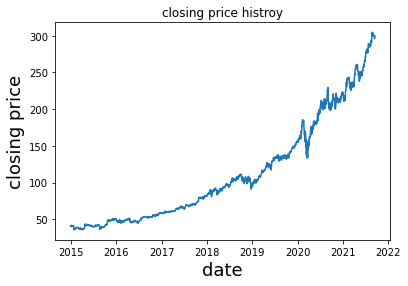

In [9]:
plt.title('closing price histroy')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('closing price',fontsize=18)
plt.show()

In [10]:
#create the indepandent data set 
x = np.array(df[['Close']])
#remove last 30 values
x =x[:-future]

In [11]:
#create dependent data set
y = df['future_values'].values
y = y[:-future]

In [12]:
#split the data into train and test data 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=0)

In [13]:
#creating the model 
linear = LinearRegression()
linear.fit(x_train, y_train)


LinearRegression()

In [14]:
#test the model using score
confidance = linear.score(x_test, y_test)
print('accuracy of model :',confidance)

accuracy of model : 0.9851698946561251


In [15]:
#create the variable called x future values and set it equal to last 30 values 
x_future_values = np.array(df[['Close']])[-future:]
#print(x_future_values)

In [16]:
#test the model for these x values
linear_model = linear.predict(x_future_values)
print(linear_model)

[300.21465258 299.5751629  302.73071591 302.66782474 301.48315008
 299.50178987 300.03646094 303.03475398 306.22175257 308.05639877
 306.46286742 304.58273571 310.92692209 318.8991947  319.20380976
 317.07156846 316.4308607  313.36377845 314.02551404 318.09042457
 316.29430802 316.2417705  315.52752944 315.51704758 314.50867333
 314.54018302 311.43110922 309.8135369  311.15800385 314.09904734]


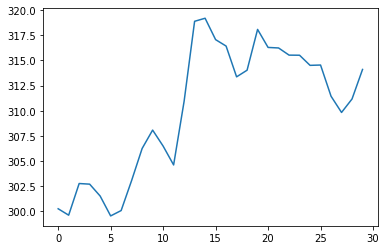

In [33]:
plt.plot(linear_model)

In [34]:
!pip freeze > requirements.txt 